In [22]:
# Importing required pakages
from pdf2image import convert_from_path
# from PIL import Image
import pandas as pd
from pytesseract import*
import argparse
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
# Defing the file path
file_path = r'data\sample.pdf'

In [4]:
# Function to convert pdf to image
def pdf_to_images(pdf_path):
    return convert_from_path(pdf_path)

In [33]:
# Calling the function to convert PDF to image
images = pdf_to_images(file_path)

In [41]:
# images[0].convert("RGB")

In [40]:
# We load the input image and then convert
# it to RGB from BGR. We then use Tesseract
# to localize each area of text in the input
# image
images = cv2.imread('data\sampleimage.png')
rgb = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)

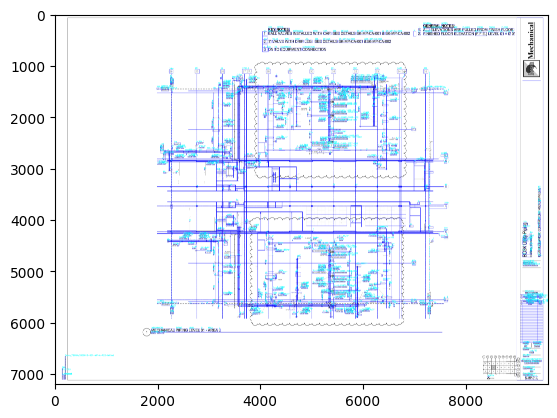

In [42]:
# Then loop over each of the individual text
# localizations
dfs = [] # Initializing a blank list to store text data
for i in range(0, len(results["text"])):
      
    # We can then extract the bounding box coordinates
    # of the text region from  the current result
    x = results["left"][i]
    y = results["top"][i]
    w = results["width"][i]
    h = results["height"][i]
      
    # We will also extract the OCR text itself along
    # with the confidence of the text localization
    text = results["text"][i]
    conf = int(results["conf"][i])

    text_dict = {'text': text, 'conf': conf, 'x': x, 'y': y, 'w': w, 'h': h}
    dfs.append(pd.DataFrame([text_dict]))

    # filter out weak confidence text localizations
    if conf > 0:
          
        # We will display the confidence and text to
        # our terminal
        # print("Confidence: {}".format(conf))
        # print("Text: {}".format(text))
        # print("")
          
        # We then strip out non-ASCII text so we can
        # draw the text on the image We will be using
        # OpenCV, then draw a bounding box around the
        # text along with the text itself
        text = "".join(text).strip()
        cv2.rectangle(images,
                      (x, y),
                      (x + w, y + h),
                      (0, 0, 255), 2)
        cv2.putText(images,
                    text,
                    (x, y - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1.2, (0, 255, 255), 3)

plt.imshow(images, cmap='gray')  # Use cmap='gray' for grayscale images
plt.show()
    

In [43]:
Image('data\sampleimage.png')

In [44]:
df = pd.DataFrame(pd.concat(dfs, ignore_index=True))

In [45]:
df.head()

text  conf     x    y     w     h
0             -1     0    0  9600  7200
1             -1  4070  202  4885   221
2             -1  4070  202  4885   221
3             -1  7171  202   618    66
4  GENERAL    96  7171  202   310    66

In [46]:
# df.to_csv('data/sample_data_2.csv', index=False)

In [19]:
# # After all, we will show the output image
# cv2.imshow("Image", images)
# cv2.waitKey(0)